## Some Observations and Insights on the Pymaceuticals study

> The population of mice in the study is evenly distributed by gender, at close to a 1:1 ratio, eliminating bias<br>
> towards either of the genders.<br>
<br>
> Of the 9 regimens (including 1 Placebo), all regimens studies had 25 mice with the exception of Stelasyn, with 24.<br>
<br>
> The coorelation between mouse weight and average tumor volume for the Capomulin regimen of 0.84 indicates strong <br>
correlation between these two factors. <br>
> From the data analysis of the 4 primary regimens analyzed (Capomulin, Ramicane, Infubinol, and Ceftamin): <br>
>> The mice on the Capomulin and Ramicane regimens showed the smallest tumor volume, a possible indication of the <br>  effectivenessof these regimens.<br> <br> 
>> Very few outliers were identified from the data, a possible indication of good practices in data collection






In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()
mouse_metadata.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_study_complete_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")
# Display the data table for preview
mouse_study_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# This returns all duplicates except the first occurrence of each (Keep = First or Last) 
mouse_study_duplicates_df = mouse_study_complete_df[mouse_study_complete_df.duplicated(['Mouse ID','Timepoint'],keep = 'first')]
mouse_study_duplicates_df
# This shows there are 5 duplicate rows 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
# This returns all duplicate data where Mouse ID and Timpoint are duplicated, setting Keep = First or Last, keeps the first or last row
# of the duplicated set. 
# returns just the last or first duplicated row.
mouse_study_duplicates_all_df = mouse_study_complete_df[mouse_study_complete_df.duplicated(['Mouse ID','Timepoint'],keep = False)]
mouse_study_duplicates_all_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_complete_df.drop_duplicates(['Mouse ID','Timepoint'],keep = 'first')
mouse_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean_df['Mouse ID'].count()

1888

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_regimen_tumor_df1 = mouse_study_clean_df[['Drug Regimen','Tumor Volume (mm3)']]
drug_regimen_tumor_grouped1 = drug_regimen_tumor_df1.groupby('Drug Regimen')

drtg1_mean = drug_regimen_tumor_grouped1.mean()
drtg1_median = drug_regimen_tumor_grouped1.median()
drtg1_var = drug_regimen_tumor_grouped1.var()
drtg1_std = drug_regimen_tumor_grouped1.std()
drtg1_SEM = drug_regimen_tumor_grouped1.sem()

combined_drug_regimen_summary = pd.merge(drtg1_mean,drtg1_median,how='left',on =['Drug Regimen'])
combined_drug_regimen_summary = pd.merge(combined_drug_regimen_summary, drtg1_var,how='left',on =['Drug Regimen'])
combined_drug_regimen_summary = pd.merge(combined_drug_regimen_summary, drtg1_std,how='left',on =['Drug Regimen'])
combined_drug_regimen_summary = pd.merge(combined_drug_regimen_summary, drtg1_SEM,how='left',on =['Drug Regimen'])

combined_drug_regimen_summary.columns = ['Mean','Median','Variance','Standard Deviation','SEM']
combined_drug_regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
drug_regimen_tumor_df = mouse_study_clean_df[['Drug Regimen','Tumor Volume (mm3)']]
drug_regimen_tumor_grouped = drug_regimen_tumor_df.groupby('Drug Regimen')

drtg = drug_regimen_tumor_grouped.agg([np.mean,np.median,np.var,np.std,st.sem])
drtg.columns = ['Mean','Median','Variance','Standard Deviation','SEM']
drtg

C:\Users\paulf\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\paulf\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\paulf\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
# Find the total number of mice per regimen, total mice in the study is 249, so total per regimen should add up to at most 249
mouse_study_clean_df
mouse_study_groupby_df = mouse_study_clean_df.groupby('Drug Regimen')

mouse_study_groupby_df = mouse_study_groupby_df.agg({'Mouse ID':'nunique'})
mouse_study_groupby_df = mouse_study_groupby_df.reset_index(inplace= False)

mouse_study_groupby_df = mouse_study_groupby_df[['Drug Regimen','Mouse ID']]

mouse_study_groupby_df

,Drug Regimen,Mouse ID
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,25
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


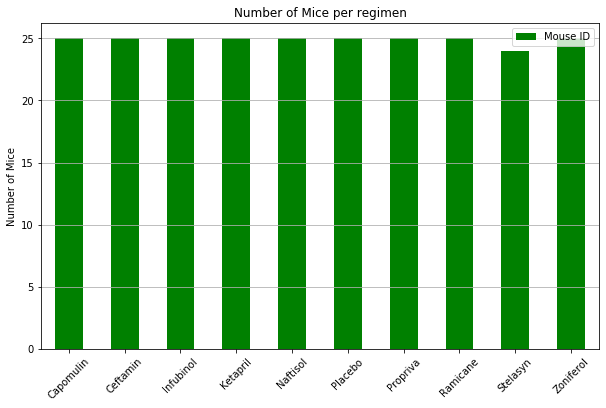

In [13]:
#1 BAR PLOTS 
# Using Pandas dataframe.plot, plot the number of mice per regimen.

x_axis = np.arange(len(mouse_study_groupby_df))
tick_locations = [value for value in x_axis]

mouse_study_groupby_df.plot(kind="bar", figsize=(10,6), rot = 45, color = 'g')
plt.xticks(tick_locations, mouse_study_groupby_df["Drug Regimen"], rotation="45")
plt.title("Number of Mice per regimen")
plt.ylabel("Number of Mice")
plt.grid(axis = 'y')

plt.show()


In [14]:
#2 BAR PLOTS
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_study_clean_df
# mouse_study_groupby_df = pd.DataFrame(mouse_study_clean_df.groupby(['Drug Regimen']).count()['Mouse ID'])
# mouse_study_groupby_df= mouse_study_groupby_df.rename(columns = { 'Mouse ID' : "Number of Mice"})
mouse_study_groupby_df.index.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

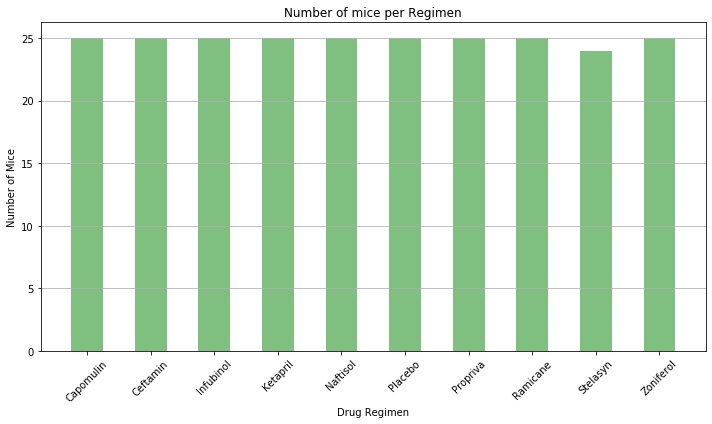

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(mouse_study_groupby_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,6))

#Plot using matplotlib.plot()
plt.bar(x_axis, mouse_study_groupby_df["Mouse ID"], color= 'green', alpha=0.5, align="center" , width = .5)

plt.xticks(tick_locations, mouse_study_groupby_df["Drug Regimen"], rotation="45")
plt.title("Number of mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

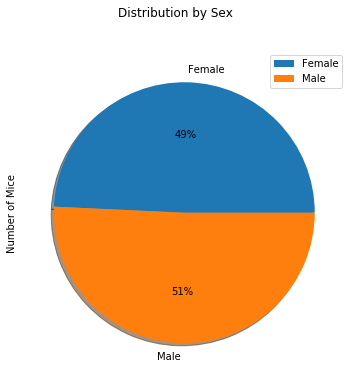

In [16]:
# 3 PIE Plots
# Generate a pie plot showing the distribution of female versus male mice using pandas.DataFrame.plot()

# Start with cleaned mouse study data (no duplicate rows)
mouse_study_clean_df
mouse_study_sex_groupby_df = pd.DataFrame(mouse_study_clean_df.groupby(['Sex']).count()['Mouse ID'])
mouse_study_sex_groupby_df= mouse_study_sex_groupby_df.rename(columns = { 'Mouse ID' : "Number of Mice"})
mouse_study_sex_groupby_df
# Plot the graph
mouse_study_sex_groupby_df.plot(kind="pie", subplots = True, figsize=(10,6), shadow = True,legend = True, title = "Distribution by Sex",autopct='%1.0f%%',label=False)
plt.axis = ('equal')
plt.show()

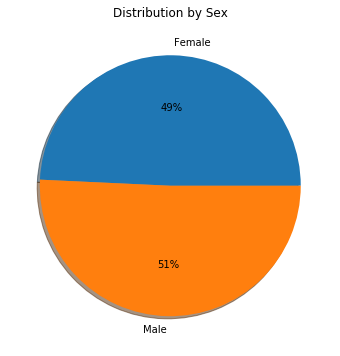

In [17]:
# 3 PIE Plots
# Generate a pie plot showing the distribution of female versus male mice using matplotlib.pyplot()
mouse_study_clean_df
mouse_study_sex_groupby_df = pd.DataFrame(mouse_study_clean_df.groupby(['Sex']).count()['Mouse ID'])
mouse_study_sex_groupby_df= mouse_study_sex_groupby_df.rename(columns = { 'Mouse ID' : "Number of Mice"})
mouse_study_sex_groupby_df

#Build lists from the mouse_study_sex_groupby_df to pass to the plt.pie pyplot module.
mice_counts_list= mouse_study_sex_groupby_df['Number of Mice'].to_list()
genders_list =  mouse_study_sex_groupby_df.index

plt.figure(figsize=(10,6))

# Plot the pie chart, setting percent value format, and shadow = True, title.
plt.pie(mice_counts_list, labels = genders_list,autopct='%1.0f%%',shadow=True)
plt.title("Distribution by Sex")
plt.axis = ('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across 4 of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# mouse_study_clean_df2 = mouse_study_clean_df
# mouse_study_clean_df = mouse_study_clean_df.set_index('Drug Regimen',inplace=True)
mouse_study_clean_df
filter_regimens_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# List filtered down to just the 4 regimens (814 Rows)
mouse_study_filtered_df = mouse_study_clean_df[mouse_study_clean_df['Drug Regimen'].isin(filter_regimens_list)]

mouse_study_filtered_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [19]:
# Start by getting the last (greatest) timepoint for each mouse
# Reduce the DataFrame to just the columns of interest
mouse_study_filtered_max_timepoint_df = mouse_study_filtered_df[['Drug Regimen','Mouse ID','Timepoint']]
# Groupby Drug Regimen & Mouse ID, so we can get the max Timepoint per mouse per regimen.
max_timepoint_per_mouse_regimen = pd.DataFrame(mouse_study_filtered_max_timepoint_df.groupby(['Drug Regimen','Mouse ID']).max()['Timepoint'])
max_timepoint_per_mouse_regimen


Timepoint
Drug Regimen Mouse ID           
Capomulin    b128             45
             b742             45
             f966             20
             g288             45
             g316             45
...                          ...
Ramicane     s508             45
             u196             45
             w678              5
             y449             15
             z578             45

[100 rows x 1 columns]

In [20]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tumor_volumes_df = pd.merge(max_timepoint_per_mouse_regimen, mouse_study_clean_df, on= ['Mouse ID', 'Timepoint'], how= 'inner')
max_tumor_volumes_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,s508,45,Ramicane,Male,1,17,30.276232,0
96,u196,45,Ramicane,Male,18,25,40.667713,3
97,w678,5,Ramicane,Female,5,24,43.166373,0
98,y449,15,Ramicane,Male,19,24,44.183451,0


In [21]:
#Quantative Analysis for all 4 Drug regimens together, followed by quantatitive analysis for each regimen.

# Put treatments into a list for use in for loop (and later for plot labels)
filter_regimens_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = max_tumor_volumes_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The median of tumor volume is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The median of tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [22]:
#Quantative analysis per drug regimen
# Locate the rows which contain mice on each drug and get the tumor volumes
max_tumor_volumes_per_regimen_groupby = max_tumor_volumes_df.groupby('Drug Regimen')   
#capomulin_group = max_tumor_volumes_per_regimen_groupby.get_group('Capomulin')
#ramicane_group = max_tumor_volumes_per_regimen_groupby.get_group('Ramicane')
#infubinol_group = max_tumor_volumes_per_regimen_groupby.get_group('Infubinol')
#ceftamin_group = max_tumor_volumes_per_regimen_groupby.get_group('Ceftamin')

#loop through the list of the 4 regimens and calculate IQR and identify possible outliers 

for regimen in filter_regimens_list:
    regimen_group = regimen+'_group'
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #quartiles = regimen_group['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    quartiles = max_tumor_volumes_per_regimen_groupby.get_group(regimen)['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print("For "+   regimen.upper())
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The median of tumor volume is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print()

For CAPOMULIN
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

For RAMICANE
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

For INFUBINOL
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

For CEFTAMIN
The lower quartile of t

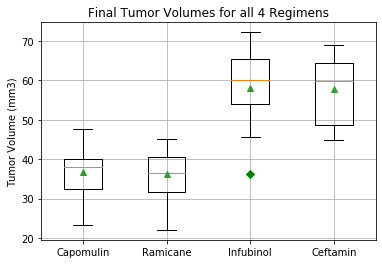

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest.
# Request is to have all 4 plots in the same graph.

x_axis = np.arange(1, len(filter_regimens_list)+1)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

    
tumor_volume_data =[]
for regimen in filter_regimens_list:
    tumor_volume_data.append(max_tumor_volumes_per_regimen_groupby.get_group(regimen)['Tumor Volume (mm3)'])

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for all 4 Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_data, 0, 'gD',showmeans =True)
plt.xticks(tick_locations, filter_regimens_list)
plt.grid()
plt.show()

## Line and Scatter Plots

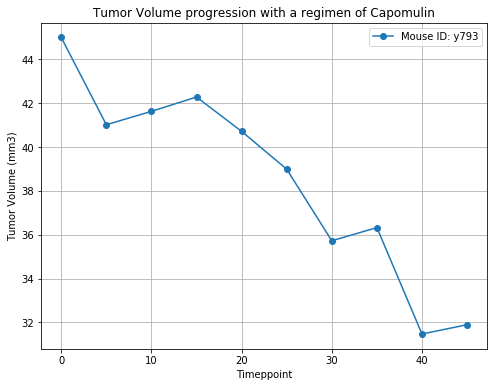

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Starting with mouse_study_filtered_df which contains all mouse data for the 4 regimens in focus
# Set a filter to only select rows where Drug Regimen is Capomulin and select a particular Mouse ID
filt = (mouse_study_filtered_df["Drug Regimen"] == "Capomulin") & (mouse_study_filtered_df['Mouse ID'] == 'y793')
# Apply the filter and grab the columns we will need for the plot.
result_df = mouse_study_filtered_df.loc[filt,['Drug Regimen','Mouse ID','Timepoint','Tumor Volume (mm3)']]
result_df

# Plot the tumor progression over time
plt.figure(figsize=(8,6))
plt.plot(result_df['Timepoint'],result_df['Tumor Volume (mm3)'],label = "Mouse ID: y793", marker = 'o' )

plt.title("Tumor Volume progression with a regimen of Capomulin")
plt.xlabel("Timeppoint")
plt.ylabel("Tumor Volume (mm3)")

plt.legend()
plt.grid()
plt.show()

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Starting with mouse_study_filtered_df which contains all mouse data for the 4 regimens in focus
# Set a filter to only select rows where Drug Regimen is Capomulin
filt = (mouse_study_filtered_df["Drug Regimen"] == "Capomulin") 
# Apply the filter and grab the columns we will need for the plot - mouse id, weight, and tumor volume.
result_df = mouse_study_filtered_df.loc[filt,['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
#result_df
# Group the mice by weight
weight_grpby = result_df.groupby(['Mouse ID','Weight (g)']).mean()['Tumor Volume (mm3)']
#weight_grpby
# Get the average (mean) tumor volume per weight
weight_grpby_df = pd.DataFrame(weight_grpby)
weight_grpby_df.reset_index(inplace = True) #Makes the columns accessible to the plot
weight_grpby_df

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


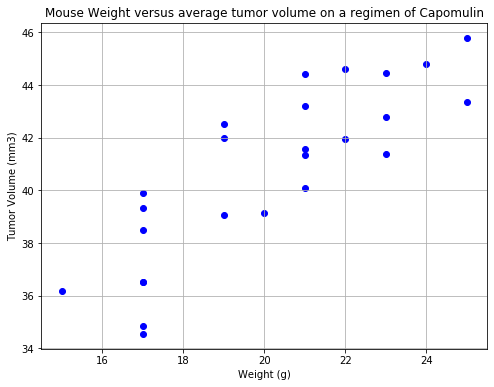

In [26]:
# Plot the tumor progression over time
plt.figure(figsize=(8,6))
plt.scatter(weight_grpby_df['Weight (g)'],weight_grpby_df['Tumor Volume (mm3)'], marker = 'o',facecolors="blue" )

plt.title("Mouse Weight versus average tumor volume on a regimen of Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = weight_grpby_df.iloc[:,1]
tumor_vol = weight_grpby_df.iloc[:,2]
correlation = st.pearsonr(weight,tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


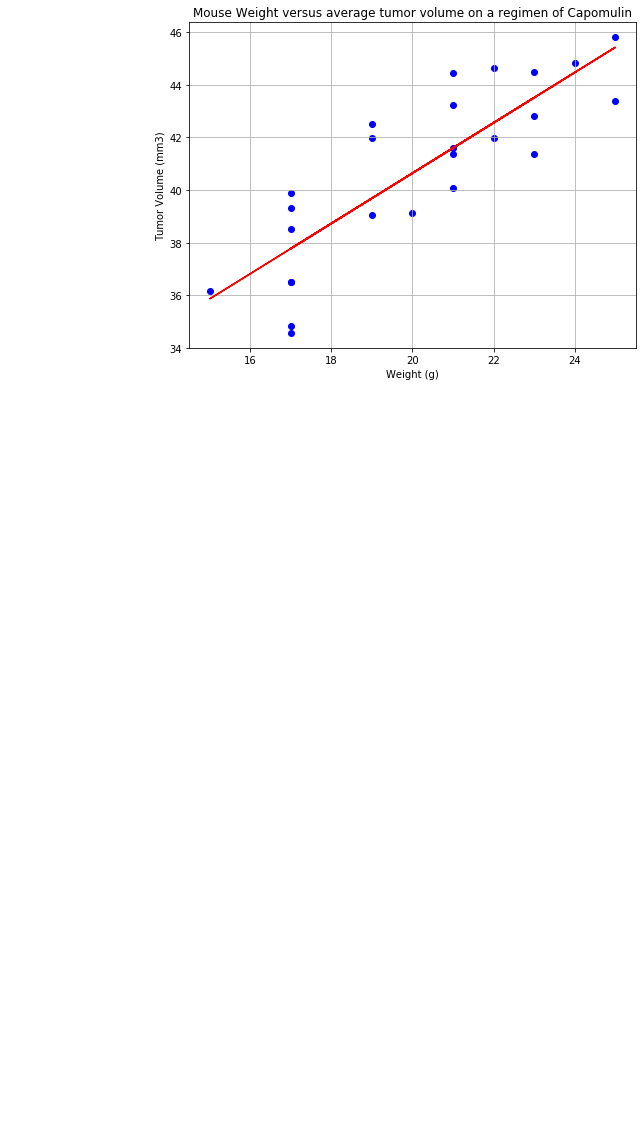

In [28]:
#Plot the linear regression model on top of the previous scatter plot.
plt.figure(figsize=(8,6))
x_values = weight_grpby_df['Weight (g)']
y_values = weight_grpby_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,marker = 'o',facecolors="blue")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,5),fontsize=15,color="red")

plt.title("Mouse Weight versus average tumor volume on a regimen of Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

plt.show()